In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

In [5]:
global root

def time_sleep():
    
    time.sleep(1)
    
def initial_plot_updated(fig, ax, canvas, convex_hull):

    time_sleep()

    # draw Convex Hull points
    ax.scatter([x[0] for x in convex_hull], [y[1] for y in convex_hull], c = 'r', marker='o', label='Highlighted Points')

    # Draw a line between the highlighted points
    ax.plot([x[0] for x in convex_hull], [y[1] for y in convex_hull], 'k--', linewidth=1, label='Line between Highlighted Points')

    # Display the plot in the notebook
    # display(fig)
    clear_output(wait=True)

    canvas.draw()
    
    return fig, ax, canvas


def update_plot_internally(fig, ax, p1, p2, farthest_point, canvas):

    time_sleep()

    # draw Convex Hull points
    ax.scatter(farthest_point[0], farthest_point[1], c = 'r', marker='o')

    # Draw a line between the highlighted points
    ax.plot([farthest_point[0], p1[0]], [farthest_point[1], p1[1]], 'k--', linewidth=1)
    ax.plot([farthest_point[0], p2[0]], [farthest_point[1], p2[1]], 'k--', linewidth=1)


    # Display the plot in the notebook
    # display(fig)
    clear_output(wait=True)

    canvas.draw()

    return fig, ax, canvas


def final_plot(fig, ax, convex_hull, canvas):

    time_sleep()

    # Convert convex_hull to numpy array for easier manipulation
    convex_hull = np.array(convex_hull)

    # Calculate polar coordinates (angle and radius) with respect to the center
    center = np.mean(convex_hull, axis=0)
    angles = np.arctan2(convex_hull[:, 1] - center[1], convex_hull[:, 0] - center[0])
    radii = np.sqrt((convex_hull[:, 0] - center[0])**2 + (convex_hull[:, 1] - center[1])**2)

    # Sort convex_hull based on angles
    sorted_indices = np.argsort(angles)
    sorted_convex_hull = convex_hull[sorted_indices]

    # Create a plot and add the sorted convex_hull
    x_coords = sorted_convex_hull[:, 0]
    y_coords = sorted_convex_hull[:, 1]
    # ax.scatter(x_coords, y_coords, c='b', marker='o', label='Sorted convex_hull')

    # Connect the convex_hull to form the circular shape
    ax.plot(np.append(x_coords, x_coords[0]), np.append(y_coords, y_coords[0]), 'r-',  linewidth=2, label='Circular Shape')

    # Display the plot in the notebook
    # display(fig)
    clear_output(wait=True)

    canvas.draw()



def find_distance(p1, p2, p3):

    # using the formula ax + by + c = 0
    a = p1[1] - p2[1]
    b = p2[0] - p1[0]
    c = p1[0] * p2[1] - p2[0] * p1[1]

    # use dot product to find the distance between a line and a point
    return abs( a * p3[0] + b * p3[1] + c) / math.sqrt(a * a + b * b)



def create_segment(p1, p2, v):

    above = []
    below = []

    if p2[0] - p1[0] == 0:
        return above, below
    
    #calculate m and o from y = mx + o
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    c = -m * p1[0] + p1[1]

    #loop through each coordinate and place it into the correct list
    for coordinate in v:

        #y > mx + o means it is above the line
        if coordinate[1] > m * (coordinate[0]) + c:
            above.append(coordinate)
        #y < mx + o means it is below the line
        elif coordinate[1] < m * (coordinate[0]) + c:
            below.append(coordinate)


    return above, below



def upper_lower_hull(fig, ax, p1, p2, segment, flag, canvas):

    if segment == [] or p1 is None or p2 is None:
        return []

    convex_hull = []

    # calculate the distance of every point from the line to find the farthest point
    farthest_distance = -1
    farthest_point = None

    for point in segment:

        distance = find_distance(p1, p2, point)

        if distance > farthest_distance:
            
            farthest_distance = distance
            farthest_point = point


    #update Plot 
    if farthest_point:
        
        convex_hull = convex_hull + [farthest_point]

        fig, ax, canvas = update_plot_internally(fig, ax, p1, p2, farthest_point, canvas)
        root.update()  # Update the GUI



    # point is now in the convex hull so remove it from the segment
    segment.remove(farthest_point)

    # determine the segments formed from two lines p1-farthest_point and p2-farthest_point
    point1above, point1below = create_segment(p1, farthest_point, segment)
    point2above, point2below = create_segment(p2, farthest_point, segment)


    # only use the segmetns in the same direction, the opposite direction is contained in the convex hull
    if flag == "above":

        convex_hull = convex_hull + upper_lower_hull(fig, ax, p1, farthest_point, point1above, "above", canvas)
        convex_hull = convex_hull + upper_lower_hull(fig, ax, farthest_point, p2, point2above, "above", canvas)

    else:

        convex_hull = convex_hull + upper_lower_hull(fig, ax, p1, farthest_point, point1below, "below", canvas)
        convex_hull = convex_hull + upper_lower_hull(fig, ax, farthest_point, p2, point2below, "below", canvas)

    # print("Convex Hull in upper_lower_hull", convex_hull)

    return convex_hull


def quickhull(fig, ax, canvas, v):

    if len(v) <= 1:

        print("Es braucht mindestens 2 Punkte um eine Convexe Huelle zu erstellen")
        
        # exit()
        
    convex_hull = []

    sort = sorted(v, key = lambda x : x[0])

    p1 = sort[0]
    p2 = sort[-1]

    convex_hull = convex_hull + [p1, p2]
    
    if len(v) == 2:

        fig, ax, canvas = initial_plot_updated(fig, ax, canvas, convex_hull)

        return fig, ax, v

    # remove from the list as they are now in the convex hull
    sort.pop(0)
    sort.pop(-1)

    fig, ax, canvas = initial_plot_updated(fig, ax, canvas, convex_hull)
    root.update()  # Update the GUI

    
    #determine points above and below the line
    above, below = create_segment(p1, p2, sort)
    
    convex_hull = convex_hull + upper_lower_hull(fig, ax, p1, p2, above, "above", canvas)
    
    convex_hull = convex_hull + upper_lower_hull(fig, ax, p1, p2, below, "below", canvas)

    final_plot(fig, ax, convex_hull, canvas)

    return convex_hull

[(65.59358712178303, 226.5346617564108), (494.4421560857676, 223.50731764831906), (467.5458351031894, 421.02392278612695), (108.92179056384255, 421.1136050344245), (480.89889255066277, 351.4758442269623), (93.00278633885117, 41.96618497508642), (76.99267544053784, 102.57337032370623), (86.90572127710627, 63.13031802097946), (362.77821608813747, 51.11802535797566)]


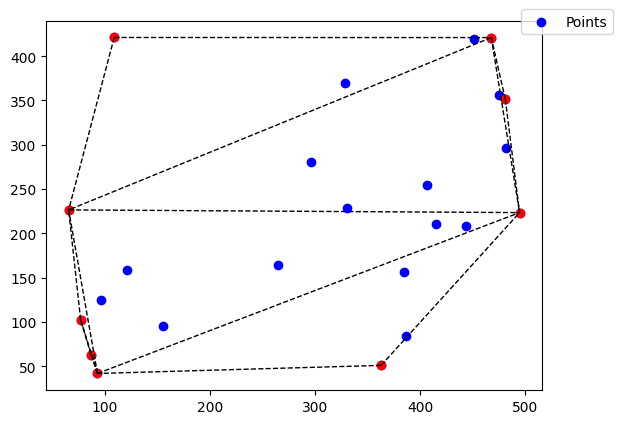

In [6]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
import random


## Create a list to store the convex hull points
CONVEX_HULL_POINTS = []
POINTS = [] # Initialize an empty list to store points


def add_point():

    point_str = point_entry.get()
    
    try:
        
        x, y = map(float, point_str.split(","))
        POINTS.append((x, y))
        update_plot()
        display_point_count()
        point_entry.delete(0, tk.END)  # Clear the input field after adding a point

    except ValueError:
        pass  # Handle invalid input

def add_random_points():

    num_points_str = num_points_entry.get()
    
    try:
        num_points = int(num_points_str)
        if num_points < 1:
            return
        for _ in range(num_points):
            x = random.uniform(0.0, 500.0)  # Adjust the range as needed
            y = random.uniform(0.0, 500.0)  # Adjust the range as needed
            POINTS.append((x, y))
        update_plot()
        display_point_count()
    
    except ValueError:
        pass

def add_point_on_enter(event):

    add_point()

def add_random_points_on_enter(event):

    add_random_points()    


def clear_points():

    global POINTS
    
    POINTS = []
    update_plot()
    display_point_count()


def update_plot():

    ax.clear()

    if POINTS:
        
        x, y = zip(*POINTS)
        ax.scatter(x, y, c='b', marker='o', label='Points')

    # Place the legend outside and under the plot
    ax.legend(loc='upper center', bbox_to_anchor = (1.05, 1.05))

    canvas.draw()

# Function that does nothing when the button is clicked
def do_nothing():
    pass

# Create a function to display the current number of points
def display_point_count():
    point_count_label.config(text=f"Number of Points: {len(POINTS)}")



def quickhull_run(fig, ax, canvas, POINTS):

    convex_hull = quickhull(fig, ax, canvas, POINTS)

    print(convex_hull)
    



# User Interface

# Create the main Tkinter window
root = tk.Tk()
root.title("Convex Hull Visualization")

root.geometry("1500x1500")
# # Calculate the center position
# screen_width = root.winfo_screenwidth()
# screen_height = root.winfo_screenheight()

# # Set the window center position
# x_position = (screen_width - root.winfo_reqwidth()) // 2
# y_position = (screen_height - root.winfo_reqheight()) // 2

# # Set the window center position
# root.geometry(f"+{x_position}+{y_position}")

# Create a Matplotlib plot in the Tkinter window
fig, ax = plt.subplots()
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().grid(row=5, column=0, columnspan=4, padx=5, pady=5)

# Create GUI elements
point_label = tk.Label(root, text="Enter Points (x.0, y.0):")
point_label.grid(row=0, column=0, padx=5, pady=5)

point_entry = tk.Entry(root)
point_entry.grid(row=1, column=0, padx=5, pady=5)
point_entry.bind("<Return>", add_point_on_enter)  # Bind the Enter key to add_point


tk.Button(root, text="Add Point", command=add_point).grid(row=2, column=0, padx=5, pady=5)
tk.Button(root, text="Clear Points", command=clear_points).grid(row=3, column=0, padx=5, pady=5)  # Button to clear points

# Input field for specifying the number of random points
num_points_label = tk.Label(root, text="Enter the number of random points:")
num_points_label.grid(row=0, column=1, padx=5, pady=5)

num_points_entry = tk.Entry(root)
num_points_entry.grid(row=1, column=1, padx=5, pady=5)
num_points_entry.bind("<Return>", add_random_points_on_enter)  # Bind the Enter key to add_point


tk.Button(root, text="Add Random Points", command=add_random_points).grid(row=2, column=1, padx=5, pady=5)
tk.Button(root, text="Clear Points", command=clear_points).grid(row=3, column=1, padx=5, pady=5)  # Button to clear points

tk.Button(root, text="Quickhull", command=lambda:quickhull_run(fig, ax, canvas, POINTS)).grid(row=1, column=2, rowspan=3, padx=5, pady=5)

# Create a label to display the point count
point_count_label = tk.Label(root, text="Number of Points: 0")
point_count_label.grid(row=4, column=0, columnspan=4, padx=10, pady=10)

root.mainloop()